<a href="https://colab.research.google.com/github/Roberta-alv/MvpRobertaprepdados/blob/main/MvpRoberta1709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de um banco de dados que mostra informações de custo de vida, aluguel e alimentação  de várias cidades ao redor do mundo as comparando diretamente com a cidade de Nova York(que teve o seu valor atribuído em 100%)
Trata-se de um aprendizado não supervisionado
Procura-se com este notebook fazer o análise exploratória e pré-processamento de Dados analisando a dispersão das variáveis das demais países em relação a Nova York
Há uma hipótese que Nova York tenha custo de vida e de alimentação significativamente maior quando comparados às médias dos países do mundo

In [2]:
# importação do Pandas
import pandas as pd

# importação do Plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# importando dados uma url para um dataframe
url_dados = 'https://raw.githubusercontent.com/Roberta-alv/MvpRobertaprepdados/main/CUSTODEVIDA22.csv'

# labels dos atributos do dataset
labels_atributos = ['PAÍS', 'ÍNDICE DE CUSTO DE VIDA', 'ÍNDICE DE ALUGUEL', 'CUSTO DE VIDA+ALUGUEL', 'PREÇO DOS ALIMENTOS', 'ÍNDICE DE PREÇO DOS RESTAURANTES', 'PODER DE COMPRA LOCAL']

# carga do dataset através da url
CUSTODEVIDA22 = pd.read_csv(url_dados, names=labels_atributos, header=0)

# verificando se CUSTODEVIDA22 é um dataframe
print(type(CUSTODEVIDA22))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#valores faltantes
CUSTODEVIDA22.isnull().sum()

,0
PAÍS,0
ÍNDICE DE CUSTO DE VIDA,0
ÍNDICE DE ALUGUEL,0
CUSTO DE VIDA+ALUGUEL,0
PREÇO DOS ALIMENTOS,0
ÍNDICE DE PREÇO DOS RESTAURANTES,0
PODER DE COMPRA LOCAL,0


Não há valores faltantes no dataframe

In [ ]:
# verificando os tipos de cada coluna do dataframe
CUSTODEVIDA22.dtypes

,0
PAÍS,object
ÍNDICE DE CUSTO DE VIDA,float64
ÍNDICE DE ALUGUEL,float64
CUSTO DE VIDA+ALUGUEL,float64
PREÇO DOS ALIMENTOS,float64
ÍNDICE DE PREÇO DOS RESTAURANTES,float64
PODER DE COMPRA LOCAL,float64


In [ ]:
# exibindo a quantidade de linhas por coluna
CUSTODEVIDA22.count()

,0
PAÍS,121
ÍNDICE DE CUSTO DE VIDA,121
ÍNDICE DE ALUGUEL,121
CUSTO DE VIDA+ALUGUEL,121
PREÇO DOS ALIMENTOS,121
ÍNDICE DE PREÇO DOS RESTAURANTES,121
PODER DE COMPRA LOCAL,121


In [ ]:
# exibindo as primeiras linhas

CUSTODEVIDA22.head()

,PAÍS,ÍNDICE DE CUSTO DE VIDA,ÍNDICE DE ALUGUEL,CUSTO DE VIDA+ALUGUEL,PREÇO DOS ALIMENTOS,ÍNDICE DE PREÇO DOS RESTAURANTES,PODER DE COMPRA LOCAL
2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
6,Norway,76.0,26.2,52.1,79.0,73.5,114.7


In [5]:
# exibindo a média de cada atributo, agrupado por espécie
CUSTODEVIDA22.groupby('PAÍS').mean()

,ÍNDICE DE CUSTO DE VIDA,ÍNDICE DE ALUGUEL,CUSTO DE VIDA+ALUGUEL,PREÇO DOS ALIMENTOS,ÍNDICE DE PREÇO DOS RESTAURANTES,PODER DE COMPRA LOCAL
PAÍS,,,,,,
Albania,42.1,10.6,27.0,42.0,35.7,39.9
Algeria,28.9,3.8,16.9,36.8,14.0,29.9
Argentina,29.4,7.6,18.9,29.7,24.8,41.5
Armenia,41.0,19.0,30.5,36.0,38.9,38.5
Australia,70.2,33.4,52.5,77.3,62.5,127.4
...,...,...,...,...,...,...
Uruguay,54.1,13.8,34.8,52.1,50.2,56.3
Uzbekistan,26.4,11.2,19.1,28.4,18.6,39.3
Venezuela,38.3,5.8,22.7,39.5,37.7,14.7


Text(0, 0.5, 'ÍNDICE DE ALUGUEL')

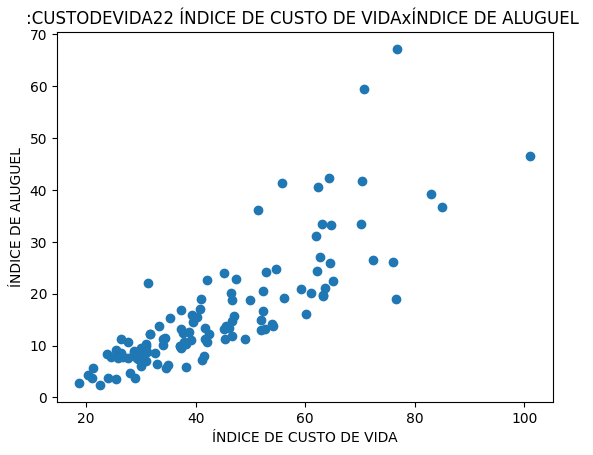

In [ ]:
# plotando o gráfico de índice de custo de vida X índice de aluguel

plt.scatter(CUSTODEVIDA22['ÍNDICE DE CUSTO DE VIDA'], CUSTODEVIDA22['ÍNDICE DE ALUGUEL'])
plt.title(':CUSTODEVIDA22 ÍNDICE DE CUSTO DE VIDAxÍNDICE DE ALUGUEL ')
plt.xlabel('ÍNDICE DE CUSTO DE VIDA')
plt.ylabel('ÍNDICE DE ALUGUEL')

Pode-se notar analisando o gráfico de Indice de Aluguel x Indice de custo de vida tem uma correlação positiva na maioria das cidades

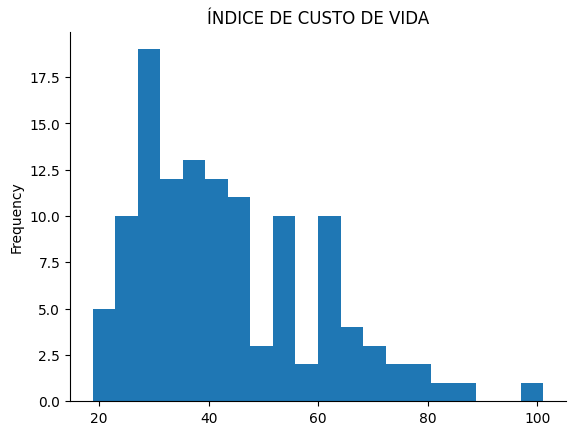

In [ ]:
# ÍNDICE DE CUSTO DE VIDA- Histograma

from matplotlib import pyplot as plt
CUSTODEVIDA22['ÍNDICE DE CUSTO DE VIDA'].plot(kind='hist', bins=20, title='V')
plt.gca().spines[['top', 'right',]].set_visible(False)

Por esse gráfico é possível ver que a maioria dos países se concentra com o custo de vida abaixo de 60% do custo de vida de Nova York

In [ ]:
# exibindo um sumário estatístico
CUSTODEVIDA22.describe()

,ÍNDICE DE CUSTO DE VIDA,ÍNDICE DE ALUGUEL,CUSTO DE VIDA+ALUGUEL,PREÇO DOS ALIMENTOS,ÍNDICE DE PREÇO DOS RESTAURANTES,PODER DE COMPRA LOCAL
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


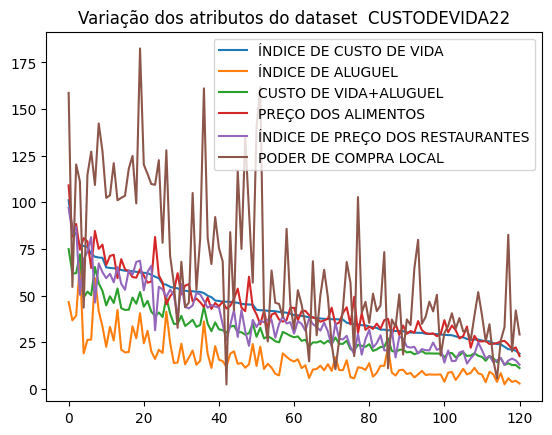

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = CUSTODEVIDA22.columns.drop(['PAÍS'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset CUSTODEVIDA22 - de 0 a 121
x_data = range(0,  CUSTODEVIDA22.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['ÍNDICE DE CUSTO DE VIDA', 'ÍNDICE DE ALUGUEL', 'PREÇO DOS ALIMENTOS', 'PODER DE COMPRA LOCAL']
    plt.plot(x_data,  CUSTODEVIDA22[atributo], label=atributo)

# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset  CUSTODEVIDA22')
plt.legend();

Por esse gráfico acima podemos perceber que a variável com a maior variação é o "Poder de compra Local"

In [10]:
# prompt: mínimo, máximo, mediana, moda, média, desvio-padrão dos labels_atributos

# Calculando mínimo, máximo, mediana, moda, média e desvio-padrão para cada atributo
for atributo in labels_atributos[1:]:  # Ignorando a coluna 'PAÍS'
  print(f"Atributo: {atributo}")
  print(f"Mínimo: {CUSTODEVIDA22[atributo].min()}")
  print(f"Máximo: {CUSTODEVIDA22[atributo].max()}")
  print(f"Mediana: {CUSTODEVIDA22[atributo].median()}")
  # A moda pode não ser única ou pode não existir
  try:
    print(f"Moda: {CUSTODEVIDA22[atributo].mode()[0]}")
  except:
    print("Moda: Não definida ou múltiplas modas")
  print(f"Média: {CUSTODEVIDA22[atributo].mean()}")
  print(f"Desvio Padrão: {CUSTODEVIDA22[atributo].std()}")
  print("\n")


Atributo: ÍNDICE DE CUSTO DE VIDA
Mínimo: 18.8
Máximo: 85.0
Mediana: 39.45
Moda: 26.4
Média: 43.075833333333335
Desvio Padrão: 15.325685562322557


Atributo: ÍNDICE DE ALUGUEL
Mínimo: 2.4
Máximo: 67.2
Mediana: 12.350000000000001
Moda: 7.7
Média: 15.799166666666666
Desvio Padrão: 11.112121444494695


Atributo: CUSTO DE VIDA+ALUGUEL
Mínimo: 11.1
Máximo: 72.1
Mediana: 27.0
Moda: 18.9
Média: 29.986666666666668
Desvio Padrão: 12.6725464754985


Atributo: PREÇO DOS ALIMENTOS
Mínimo: 17.5
Máximo: 88.4
Mediana: 40.2
Moda: 25.4
Média: 43.68833333333334
Desvio Padrão: 16.05188113447088


Atributo: ÍNDICE DE PREÇO DOS RESTAURANTES
Mínimo: 12.8
Máximo: 86.8
Mediana: 32.45
Moda: 20.6
Média: 35.96666666666667
Desvio Padrão: 17.46755616012964


Atributo: PODER DE COMPRA LOCAL
Mínimo: 2.3
Máximo: 182.5
Mediana: 50.5
Moda: 25.4
Média: 64.31416666666668
Desvio Padrão: 38.78951234815002




Por esses indicadores podemos perceber que a média dos páises é em todos os indicadores bem menor que nova york.O indicador Poder de Compra Local é o que apresenta maior variação e portanto o maior desvio padrão

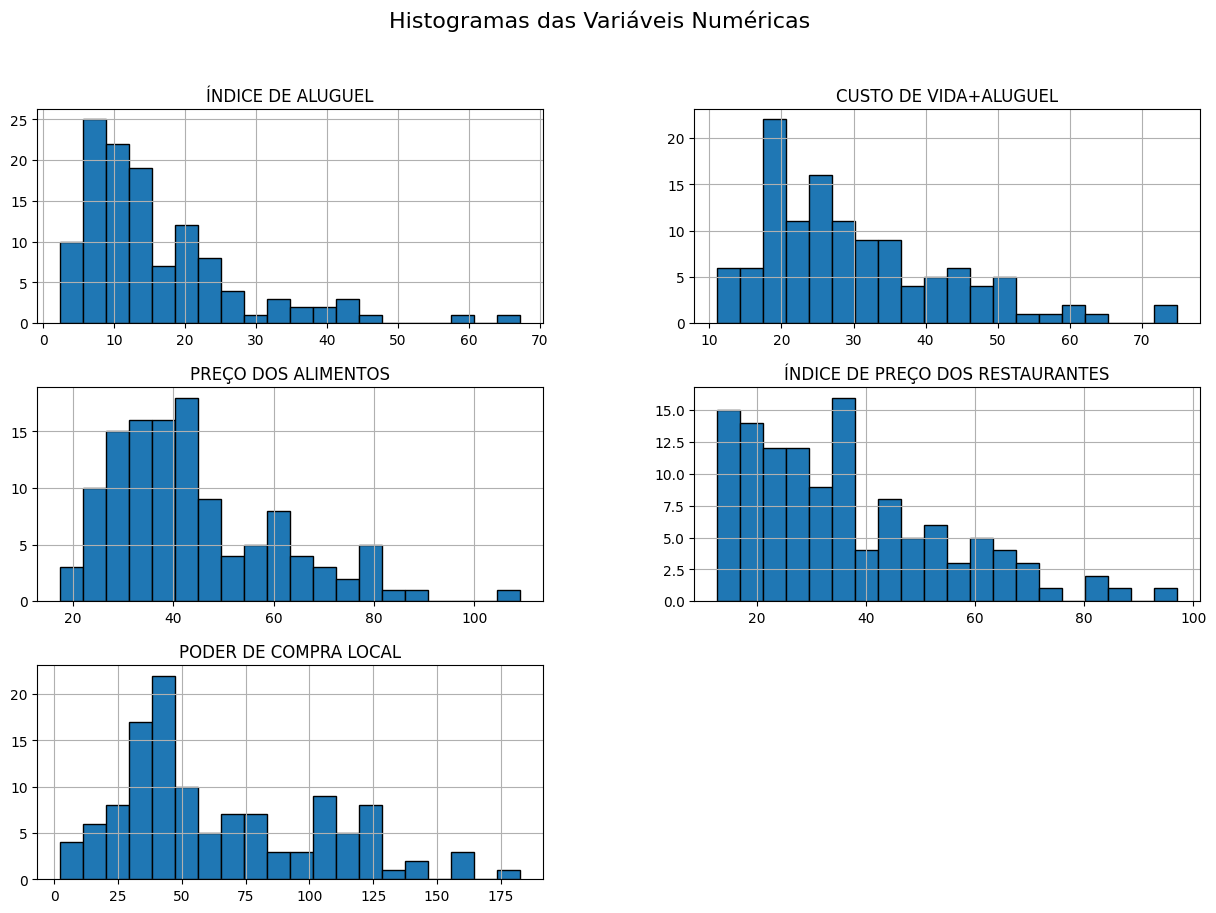

In [ ]:
# Histogramas com cada uma das variáveis numéricas
CUSTODEVIDA22.iloc[:, 2:].hist(figsize=(15, 10), bins=20,edgecolor='black')
plt.suptitle('Histogramas das Variáveis Numéricas', fontsize=16)
plt.show()

Com os Histogramas é possível constatar que, com exceção do "PODER DE COMPRA LOCAL", todos os países ficam abaixo da cidade de Nova York nos índices apresentados

In [7]:
# Os 10 países mais caros e baratos no indicador "INDICE DE CUSTO DE VIDA"
Baratos = CUSTODEVIDA22.tail(10)
Caros = CUSTODEVIDA22.head(10)

# trace1
trace1 = go.Bar(
    x=Baratos['PAÍS'],
    y=Baratos['ÍNDICE DE CUSTO DE VIDA'],
    marker=dict(color=Baratos['ÍNDICE DE CUSTO DE VIDA'], colorscale='ylgn'),
    hoverinfo='text',
    text=['PAÍS: {} ÍNDICE DE CUSTO DE VIDA: {}'.format(pais, custo) for pais, custo in zip(Baratos['PAÍS'], Baratos['ÍNDICE DE CUSTO DE VIDA'])],
    textposition='none',
    name='Os países mais baratos'
)

# trace2
trace2 = go.Bar(
    x=Caros['PAÍS'],
    y=Caros['ÍNDICE DE CUSTO DE VIDA'],
    marker=dict(color=Caros['ÍNDICE DE CUSTO DE VIDA'], colorscale='puor'),
    hoverinfo='text',
    text=['PAÍS: {} ÍNDICE DE CUSTO DE VIDA: {}'.format(pais, custo) for pais, custo in zip(Caros['PAÍS'], Caros['ÍNDICE DE CUSTO DE VIDA'])],
    textposition='none',
    name='Os países mais caros'
)

# criar subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# adicionar traços
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# atualizar layout
fig.update_layout(title='Os 10 países mais caros e baratos no indicador "ÍNDICE DE CUSTO DE VIDA')

# exibir gráfico
fig.show()

Podemos perceber pelo gráfico acima que o Nepal, Paraguay e Madagascar apresentam o menor custo em relação à Nova York e  Bahamas, Islandia e Cingapura tem os custos mais altos.Mesmo assim o país que mais se aproxima de Nova York (Bahamas) só tem 85% do valor do custo de vida da cidade americana